<a href="https://colab.research.google.com/github/MissKateD/project_2/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Data Import, Cleanup and Splitting

In [86]:
# Read in Data and create new Dataframe
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [87]:
# Verify types to ensure no data is missing or formatted incorrectly
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [88]:
# Create the feature set and target set.
x = data.drop('target', axis=1).copy()
y = data['target'].copy()
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [89]:
# Verify the Data Types to ensure we have Floats or Categories
x.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

We want the data cleaned so that our Decision Tree is less likely to incorrectly group attributes such as Chest Pain (cp). The Upgraded Data Dictionary showing which Type each column should be is as follows:
* 3 (age) - Age of Patient in Years - _***Float***_
* 4 (sex) - Integer of Patient Sex - _***Category***_
    * 1 = male
    * 2 = female
* 9 (cp) - Reported Chest Pain Type - _***Category***_
    * 1 = typical angina
    * 2 = atypical angina
    * 3 = non-anginal pain
    * 4 = asymptomatic
* 10 (trestbps) - Resting Blood Pressure - _***Float***_
* 12 (chol) - Cholestoral in mg/dl (Milligrams per Decilitre) - _***Float***_
* 16 (fbs) - Fasting Blood Sugar > 120 mg/dl - _***Float***_
* 19 (restecg) - Resting Electrocardiographic Results - _***Category***_
    * 0 = normal
    * 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2 = showing probable or definite left ventricular hypertrophy
* 32 (thalach) - Maximum Heart rate Achieved - _***Float***_
* 38 (exang) - Exercise Induced Angina (Chest Discomfort due to lack of Blood Flow, in this cae induced by exercise) - _***Float***_
* 40 (oldpeak) - ST depression induced by exercise relative to rest - _***Float***_
* 41 (slope) - Slope of the peak exercise ST segment - _***Category***_
    * 1 = upsloping
    * 2 = flat
    * 3 = downsloping
* 44 (ca) - Number of Major Vessels (0-3) colored by [flourosopy](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/fluoroscopy-procedure#:~:text=Fluoroscopy%20is%20a%20study%20of,can%20be%20seen%20in%20detail.) - _***Float***_
* 51 (thal) - _***Category***_
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversable defect
* 58 (num) - The predicted Attribute

Since we have some attributes that are supposed to be non-continuous data (Category Labeled), we need to separate them out.

In [90]:
# Encode the X data so that the Category data is split into non-continuous data
X_Encoded = pd.get_dummies(data=x, columns=['cp', 'restecg', 'slope', 'thal'])
X_Encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,2,1,0,0,0,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1


# Model 1: Logistic Regression

In [91]:
# Separate the Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, random_state=1)

# Create Scaler for data standardization
scaler = StandardScaler().fit(X_train)

# Normalization of the Train and Test Data
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)

# Create Classifier for Logistic Regression Model
lr_classifier = LogisticRegression(solver='lbfgs', max_iter=2000)
lr_classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [92]:
# Score the model
print(f"Training Data Score: {lr_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_classifier.score(X_test, y_test)}")

Training Data Score: 0.4581497797356828
Testing Data Score: 0.4605263157894737


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [93]:
# Create Predictions Dataframe
lr_predictions = lr_classifier.predict(X_test_scaled)
pd.DataFrame({'Prediction': lr_predictions, 'Actual': y_test})

,Prediction,Actual
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
...,...,...
131,1,1
234,0,0
107,1,1
285,0,0


              precision    recall  f1-score   support

   Test Data       0.75      0.69      0.72        35
 Predictions       0.75      0.80      0.78        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



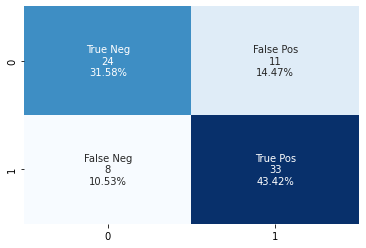

In [94]:
# Create a confusion Matrix
lr_matrix = confusion_matrix(y_test, lr_predictions)

# Create Confusion Matrix Labels
confusion_matrix_labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

def create_confusion_matrix(conf_matrix, label_names):
	value_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
	value_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
	matrix_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(label_names,value_counts,value_percentages)]
	heatmap_labels = np.asarray(matrix_labels).reshape(2,2)

	return sns.heatmap(conf_matrix, annot=heatmap_labels, fmt='', cmap='Blues', cbar=False)

# Create Heatmap Visualization
create_confusion_matrix(lr_matrix, confusion_matrix_labels)
print(classification_report(y_test, lr_predictions, target_names=['Test Data', 'Predictions']))

Not the best. Our False Negative number is still a bit to high as it indicates we would be informing patients that they do not have Heart Disease when they in fact do leading to potentially missing out on treatment (preventative or otherwise).

# Model 2: Decision Tree

In [95]:
# Create the Decision Tree Model and fit the data
dt_model = DecisionTreeClassifier(random_state=100, max_depth=4)
dt_model.fit(X_train_scaled, y_train)

# Create predictions based on the Test data
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)

# Score the Predictions for Test and Train
train_accuracy_score = accuracy_score(y_train, y_train_pred)
test_accuracy_score = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy Score: {round(train_accuracy_score, 2)}')
print(f'Test Accuracy Score: {round(test_accuracy_score, 2)}')



Train Accuracy Score: 0.92
Test Accuracy Score: 0.75


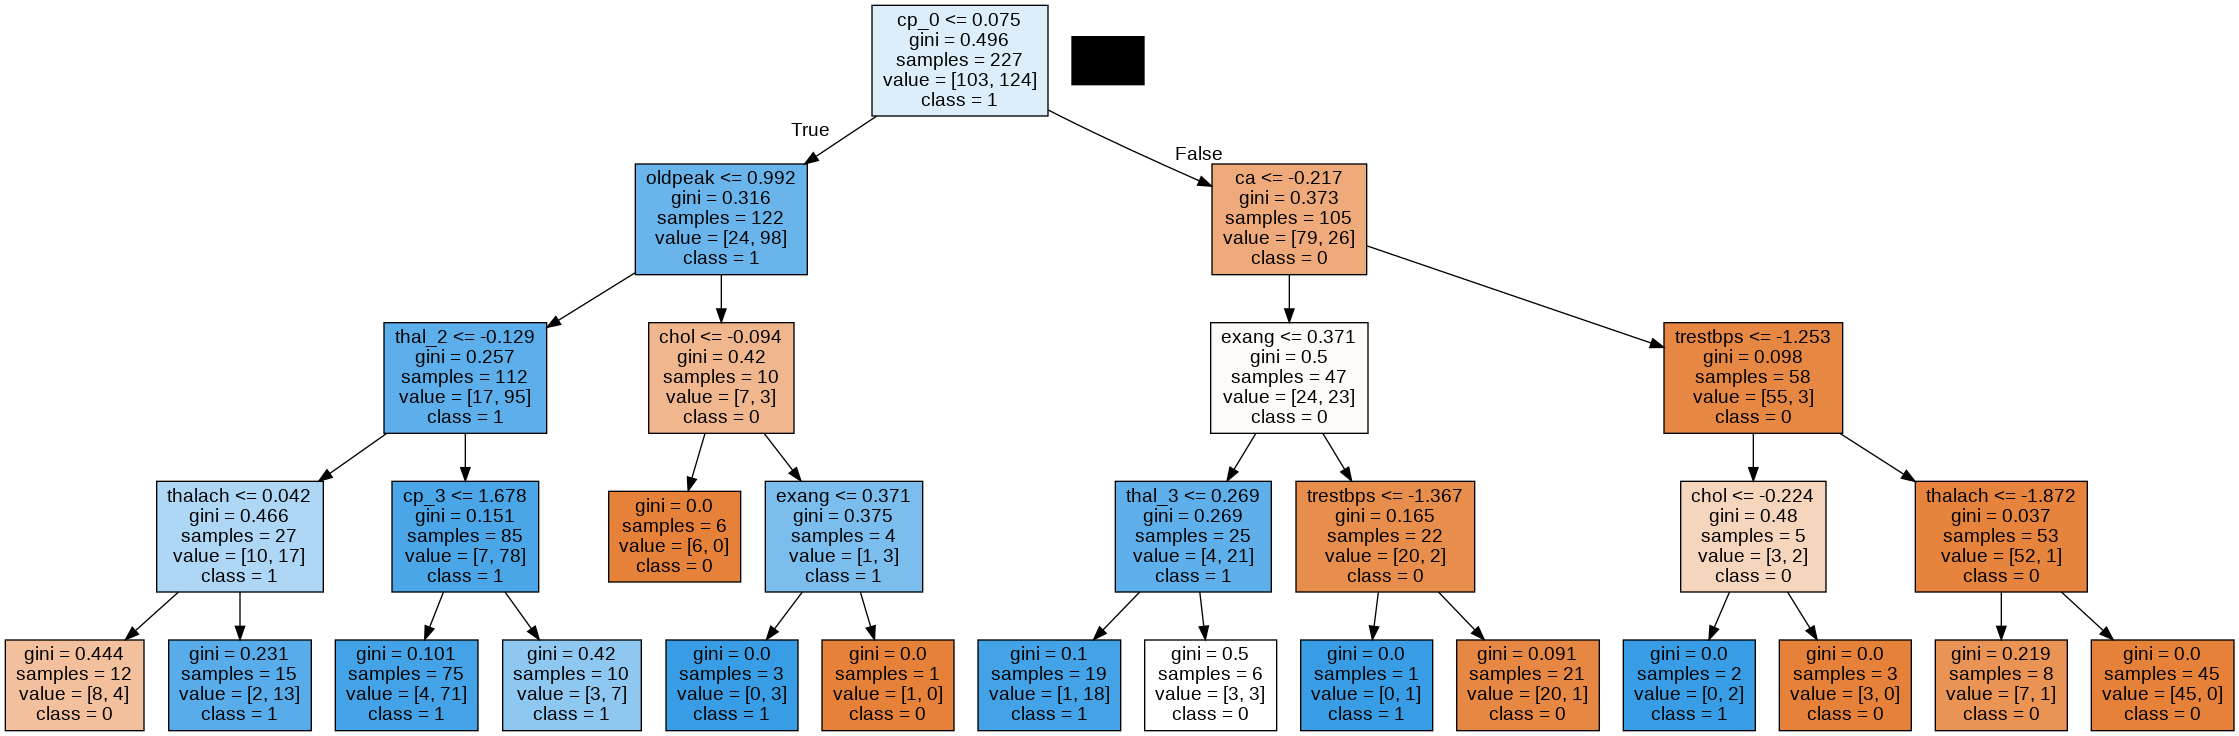

In [96]:
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names= X_Encoded.columns, class_names=["0", "1"], filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

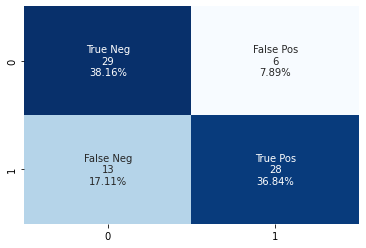

In [97]:
dt_predictions = dt_model.predict(X_test_scaled)

dt_cm = confusion_matrix(y_test, dt_predictions)

create_confusion_matrix(dt_cm, confusion_matrix_labels)

# Model 3 - Random Forest

We will use the same train and test data as above and move straight to fitting the model.

In [98]:
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=64, random_state=1)

# Fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=64, random_state=1)

In [99]:
# Create Predictions Dataframe
rf_predictions = rf_classifier.predict(X_test_scaled)
pd.DataFrame({'Prediction': rf_predictions, 'Actual': y_test})

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


,Prediction,Actual
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
...,...,...
131,1,1
234,0,0
107,1,1
285,0,0


              precision    recall  f1-score   support

   Test Data       0.80      0.69      0.74        35
 Predictions       0.76      0.85      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



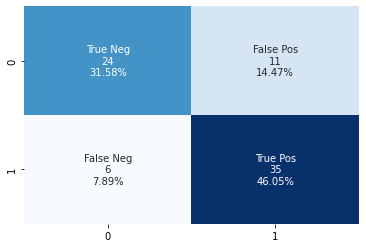

In [100]:
# Create Random Forest Matrix
rf_matrix = confusion_matrix(y_test, rf_predictions)

# Create Heatmap Visualization
create_confusion_matrix(rf_matrix, confusion_matrix_labels)
print(classification_report(y_test, rf_predictions, target_names=['Test Data', 'Predictions']))

Using Random Forest, we can see a marginal improvement in our numbers. Our ***True Negative*** and ***True Positive*** numbers
increased
from 24 and 33 predicted to 26 and 35 predicted respectively. Our ***False Positive*** and ***False Negative*** numbers also
dropped from
 11 and 8 predicted to 9 and 6 predicted respectively.

Because of our decrease in the ***False Negative*** predictions, we also see that our ***Recall number*** also increased.

# Model 4: Tensorflow

In [101]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [102]:
window_size = 10

feature_column = 1
target_column = 1

X, y = window_data(data, window_size, feature_column, target_column)

In [103]:
split = int(0.7 * len(X))

x_train = X[: split]
x_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [104]:
scaler = MinMaxScaler()
scaler.fit(X)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [105]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
     age  sex  trestbps  chol  fbs  ...  slope_2  thal_0  thal_1  thal_2  thal_3
170   56    1       130   256    1  ...        0       0       1       0       0
192   54    1       120   188    0  ...        0       0       0       0       1
168   63    1       130   254    0  ...        0       0       0       0       1
42    45    1       104   208    0  ...        0       0       0       1       0
90    48    1       124   255    1  ...        1       0       0       1       0

[5 rows x 23 columns] 

X_test sample values:
     age  sex  trestbps  chol  fbs  ...  slope_2  thal_0  thal_1  thal_2  thal_3
204   62    0       160   164    0  ...        0       0       0       0       1
159   56    1       130   221    0  ...        1       0       0       0       1
219   48    1       130   256    1  ...        1       0       0       0       1
174   60    1       130   206    0  ...        0       0       0       0       1
184   50    1       150   243    0  ...

In [106]:
# Create Tensor flow Model
tf_model = Sequential()

# Declare the number of units and Dropout fraction
number_units = 5
dropout_fraction = 0.2

# Layer 1
tf_model.add(LSTM(units=number_units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
tf_model.add(Dropout(dropout_fraction))

# Layer 2
tf_model.add(LSTM(units=number_units, return_sequences=True))
tf_model.add(Dropout(dropout_fraction))

# Layer 3
tf_model.add(LSTM(units=number_units))
tf_model.add(Dropout(dropout_fraction))

# Output layer
tf_model.add(Dense(1))

In [107]:
# Generate Summary of model
tf_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])
tf_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10, 5)             140       
                                                                 
 dropout_9 (Dropout)         (None, 10, 5)             0         
                                                                 
 lstm_10 (LSTM)              (None, 10, 5)             220       
                                                                 
 dropout_10 (Dropout)        (None, 10, 5)             0         
                                                                 
 lstm_11 (LSTM)              (None, 5)                 220       
                                                                 
 dropout_11 (Dropout)        (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [108]:
# Fit the model
tf_model.fit(x_train, y_train, epochs=10, shuffle=False, batch_size=4, verbose=1)

Epoch 1/10
51/51 [==============================] - 5s 9ms/step - loss: 0.5450 - mse: 0.5450
Epoch 2/10
51/51 [==============================] - 0s 9ms/step - loss: 0.2943 - mse: 0.2943
Epoch 3/10
51/51 [==============================] - 0s 9ms/step - loss: 0.2609 - mse: 0.2609
Epoch 4/10
51/51 [==============================] - 0s 9ms/step - loss: 0.2550 - mse: 0.2550
Epoch 5/10
51/51 [==============================] - 1s 11ms/step - loss: 0.2607 - mse: 0.2607
Epoch 6/10
51/51 [==============================] - 0s 9ms/step - loss: 0.2640 - mse: 0.2640
Epoch 7/10
51/51 [==============================] - 0s 9ms/step - loss: 0.2572 - mse: 0.2572
Epoch 8/10
51/51 [==============================] - 0s 9ms/step - loss: 0.2659 - mse: 0.2659
Epoch 9/10
51/51 [==============================] - 0s 9ms/step - loss: 0.2685 - mse: 0.2685
Epoch 10/10
51/51 [==============================] - 0s 9ms/step - loss: 0.2547 - mse: 0.2547


In [109]:
# Evaluate the model
tf_model.evaluate(x_test, y_test)

3/3 [==============================] - 1s 6ms/step - loss: 0.1797 - mse: 0.1797


[0.1797109693288803, 0.1797109693288803]

In [110]:
tf_predicted = tf_model.predict(x_test)

predicted_hrt_disease= scaler.inverse_transform(tf_predicted)
real_heart_disease = scaler.inverse_transform(y_test.reshape(-1, 1))

In [111]:
heart_disease_df = pd.DataFrame({
    "Real": real_heart_disease.ravel(),
    "Predicted": predicted_hrt_disease.ravel()
}, index = data.index[-len(real_heart_disease): ]) 
heart_disease_df.head()

,Real,Predicted
215,1.0,0.621064
216,0.0,0.645373
217,0.0,0.637465
218,1.0,0.627857
219,1.0,0.646132


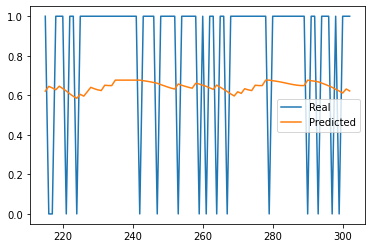

In [112]:
heart_disease_df.plot()

# Feature Importance

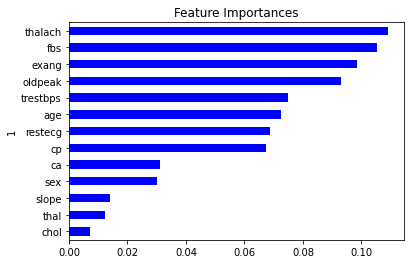

In [113]:
# Calculate feature Importances
importances = rf_classifier.feature_importances_

# Create a dataframe of the features sorted highest to lowest
rf_importances_df = pd.DataFrame(sorted(zip(importances, x.columns), reverse=True))
rf_importances_df.set_index(rf_importances_df[1], inplace=True)
rf_importances_df.drop(columns=1, inplace=True)
rf_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
rf_importances_sorted = rf_importances_df.sort_values(by='Feature Importances')

# plot the feature importances
rf_importances_sorted.plot(kind='barh', color='blue', title='Feature Importances', legend=False)